In [50]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from qualtrics import load_data
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Consistency LLMs Survey_July 16, 2025_16.21.csv')
df = df.iloc[2:]
df.rename(index={2: 'Human 1', 3: 'Human 2', 4: 'Human 3'}, inplace=True)
df.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,2025-07-11 16:25:10,2025-07-11 16:46:29,0,100,1279,1,2025-07-11 16:46:30,R_1iGl89Q8MxXlIsN,anonymous,EN,...,6,4,2,1,1,5,5,5,3,3
Human 2,2025-07-11 22:15:12,2025-07-11 22:52:14,0,100,2222,1,2025-07-11 22:52:15,R_6NX9X5fS69edVqn,anonymous,EN,...,6,6,6,6,6,6,6,6,6,6
Human 3,2025-07-11 22:52:30,2025-07-11 23:27:06,0,100,2075,1,2025-07-11 23:27:07,R_5SLk6sYPjkUIm9H,anonymous,EN,...,5,5,5,5,5,5,5,5,5,5


In [3]:
df.keys()

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel',
       'UserLanguage', 'Q_BallotBoxStuffing', 'Q472', 'Q474_1', 'Q474_2',
       'Q474_3', 'Q474_4', 'Q474_5', 'Q474_6', 'Q474_7', 'Q474_8', 'Q474_9',
       'Q474_10', 'Q474_11', 'QID2669', 'QID2670', 'QID2671', 'QID2672',
       'QID2673', 'QID2675', 'QID2676', 'QID2677', 'QID2678', 'QID2679',
       'QID2681', 'QID2682', 'QID2683', 'QID2684', 'QID2685', 'QID2687',
       'QID2688', 'QID2689', 'QID2690', 'QID2691', 'QID2693', 'QID2694',
       'QID2695', 'QID2696', 'QID2697', 'QID2699', 'QID2700', 'QID2701',
       'QID2702', 'QID2703', 'QID2705', 'QID2706', 'QID2707', 'QID2708',
       'QID2709', 'QID2711', 'QID2712', 'QID2713', 'QID2714', 'QID2715',
       'QID2717', 'QID2718', 'QID2719', 'QID2720', 'QID2721', 'QID2723',
       'QID2724', 'QID2725', 'QID2726', 'QID2727', 'QID2729', 'QID2730',
       'QID2731', 'QID2732', 'QID2733', 'Q

In [4]:
df['Q474_1']

Human 1    4
Human 2    4
Human 3    5
Name: Q474_1, dtype: object

In [5]:
# Stats on beginning questions (i.e. what is consistency to you)
q474_cols = [f'Q474_{i}' for i in range(1, 12)]
q474_numeric = df[q474_cols].apply(pd.to_numeric, errors='coerce')

means = q474_numeric.mean()
stds = q474_numeric.std()

print("Means:\n", means)
print("\nStandard Deviations:\n", stds)

Means:
 Q474_1     4.333333
Q474_2     4.333333
Q474_3     4.333333
Q474_4     4.333333
Q474_5     4.666667
Q474_6     4.333333
Q474_7     4.333333
Q474_8     2.000000
Q474_9     3.666667
Q474_10    4.000000
Q474_11    1.000000
dtype: float64

Standard Deviations:
 Q474_1     0.577350
Q474_2     1.154701
Q474_3     1.154701
Q474_4     0.577350
Q474_5     0.577350
Q474_6     1.154701
Q474_7     0.577350
Q474_8     1.000000
Q474_9     1.154701
Q474_10    1.000000
Q474_11    0.000000
dtype: float64


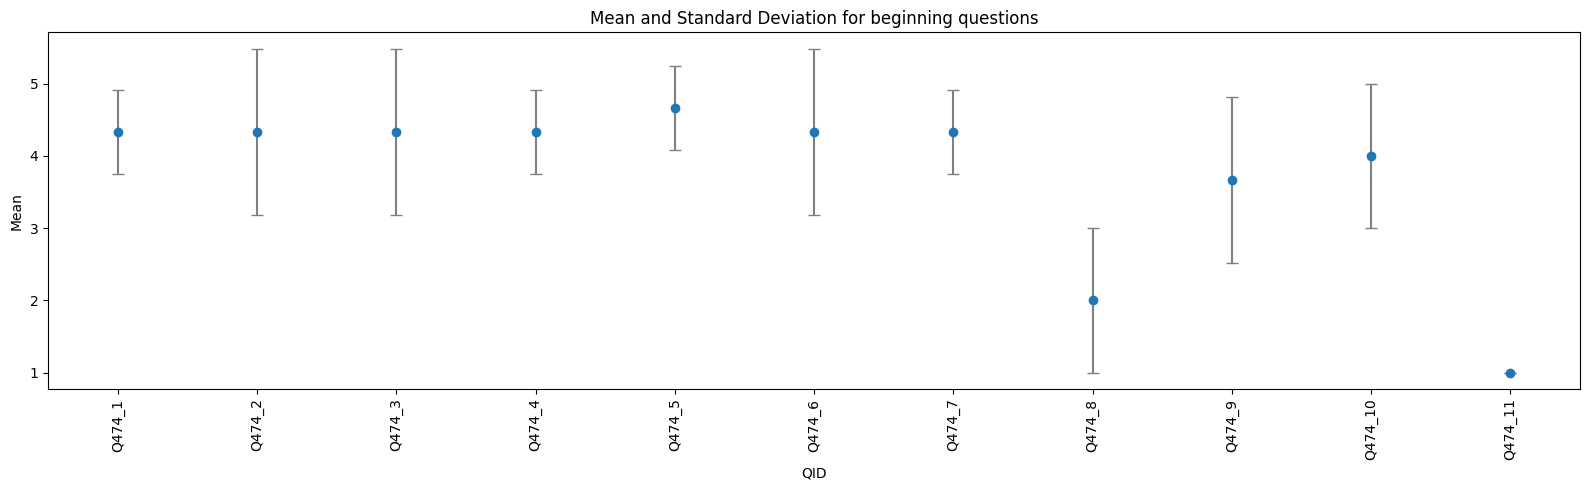

In [6]:
plt.figure(figsize=(16, 5))
plt.errorbar(means.index, means.values, yerr=stds.values, fmt='o', ecolor='gray', capsize=4)
plt.xticks(rotation=90)
plt.xlabel('QID')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for beginning questions')
plt.tight_layout()
plt.show()

In [7]:
question_list = ['QID2669', 'QID2670', 'QID2671', 'QID2672',
       'QID2673', 'QID2675', 'QID2676', 'QID2677', 'QID2678', 'QID2679',
       'QID2681', 'QID2682', 'QID2683', 'QID2684', 'QID2685', 'QID2687',
       'QID2688', 'QID2689', 'QID2690', 'QID2691', 'QID2693', 'QID2694',
       'QID2695', 'QID2696', 'QID2697', 'QID2699', 'QID2700', 'QID2701',
       'QID2702', 'QID2703', 'QID2705', 'QID2706', 'QID2707', 'QID2708',
       'QID2709', 'QID2711', 'QID2712', 'QID2713', 'QID2714', 'QID2715',
       'QID2717', 'QID2718', 'QID2719', 'QID2720', 'QID2721', 'QID2723',
       'QID2724', 'QID2725', 'QID2726', 'QID2727', 'QID2729', 'QID2730',
       'QID2731', 'QID2732', 'QID2733', 'QID2735', 'QID2736', 'QID2737',
       'QID2738', 'QID2739', 'QID2741', 'QID2742', 'QID2743', 'QID2744',
       'QID2745', 'QID2747', 'QID2748', 'QID2749', 'QID2750', 'QID2751',
       'QID2753', 'QID2754', 'QID2755', 'QID2756', 'QID2757']

In [8]:
question_numeric = df[question_list].apply(pd.to_numeric, errors='coerce')
question_numeric = question_numeric / 6


question_means = question_numeric.mean()
question_stds = question_numeric.std()

print("Means:\n", question_means)
print("\nStandard Deviations:\n", question_stds)

Means:
 QID2669    0.944444
QID2670    0.944444
QID2671    0.888889
QID2672    0.944444
QID2673    0.888889
             ...   
QID2753    0.888889
QID2754    0.888889
QID2755    0.888889
QID2756    0.777778
QID2757    0.777778
Length: 75, dtype: float64

Standard Deviations:
 QID2669    0.096225
QID2670    0.096225
QID2671    0.096225
QID2672    0.096225
QID2673    0.096225
             ...   
QID2753    0.096225
QID2754    0.096225
QID2755    0.096225
QID2756    0.254588
QID2757    0.254588
Length: 75, dtype: float64


In [9]:
question_numeric

,QID2669,QID2670,QID2671,QID2672,QID2673,QID2675,QID2676,QID2677,QID2678,QID2679,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,...,1.000000,0.666667,0.333333,0.166667,0.166667,0.833333,0.833333,0.833333,0.500000,0.500000
Human 2,0.833333,0.833333,0.833333,0.833333,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 3,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333


In [10]:
binary_table = (question_numeric > 0.5).astype(int)
binary_table.head()

,QID2669,QID2670,QID2671,QID2672,QID2673,QID2675,QID2676,QID2677,QID2678,QID2679,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,0,0
Human 2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Human 3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [11]:
row2 = question_numeric.iloc[0]
row3 = question_numeric.iloc[1]
row4 = question_numeric.iloc[2]
method = 'pearson'  # 'pearson', 'spearman', 'kendall'

print("Correlation between 2nd and 3rd row:", row2.corr(row3, method=method))
print("Correlation between 2nd and 4th row:", row2.corr(row4, method=method))
print("Correlation between 3rd and 4th row:", row3.corr(row4, method=method))

Correlation between 2nd and 3rd row: 0.2699023898705855
Correlation between 2nd and 4th row: -0.21131712606361172
Correlation between 3rd and 4th row: -0.15792647517411332


In [12]:
row2 = binary_table.iloc[0]
row3 = binary_table.iloc[1]
row4 = binary_table.iloc[2]
method = 'pearson'  # 'pearson', 'spearman', 'kendall'

print("Correlation between 2nd and 3rd row:", row2.corr(row3, method=method))
print("Correlation between 2nd and 4th row:", row2.corr(row4, method=method))
print("Correlation between 3rd and 4th row:", row3.corr(row4, method=method))

Correlation between 2nd and 3rd row: 0.24265265067645314
Correlation between 2nd and 4th row: -0.05569077228639921
Correlation between 3rd and 4th row: -0.013513513513513506


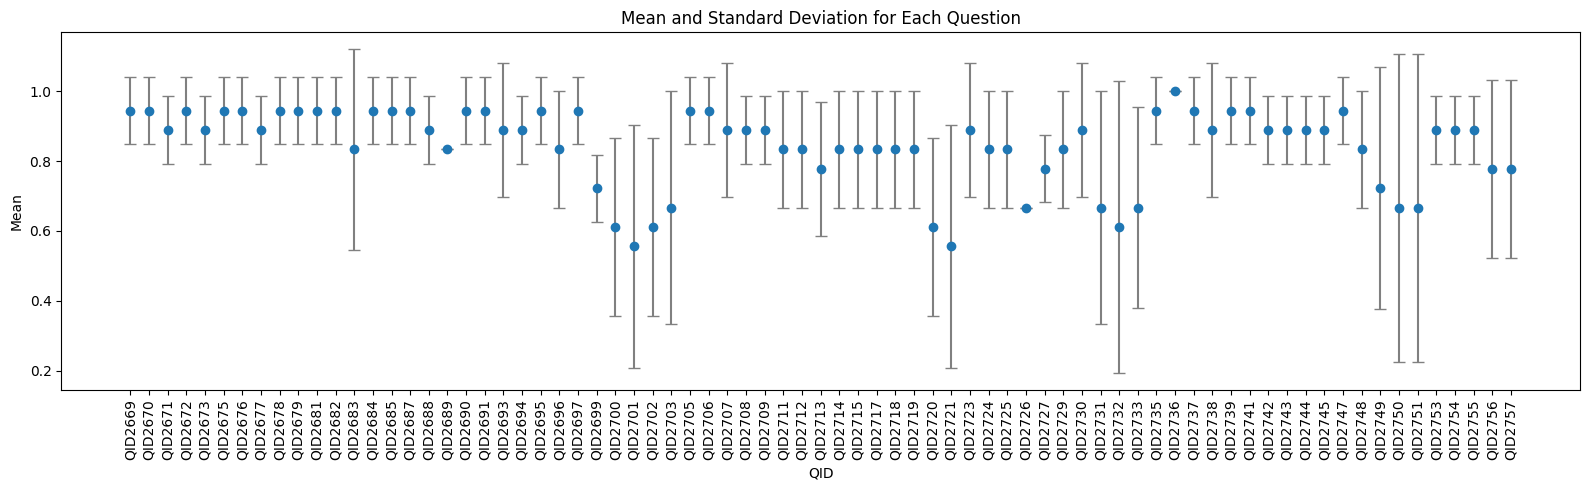

In [13]:
plt.figure(figsize=(16, 5))
plt.errorbar(question_means.index, question_means.values, yerr=question_stds.values, fmt='o', ecolor='gray', capsize=4)
plt.xticks(rotation=90)
plt.xlabel('QID')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for Each Question')
plt.tight_layout()
plt.show()

In [14]:
# Group question_means and question_stds in sets of 5
group_size = 5
num_groups = int(np.ceil(len(question_means) / group_size))

grouped_means = []
grouped_stds = []

for i in range(num_groups):
    start = i * group_size
    end = start + group_size
    group_mean = question_means.iloc[start:end].mean()
    # Propagate error: std of the mean = sqrt(sum(std_i^2))/n
    group_std = np.sqrt((question_stds.iloc[start:end] ** 2).sum()) / (end - start)
    grouped_means.append(group_mean)
    grouped_stds.append(group_std)

print("Grouped Means:", grouped_means)
print("Grouped Standard Deviations:", grouped_stds)

Grouped Means: [0.9222222222222223, 0.9333333333333333, 0.9222222222222223, 0.9111111111111112, 0.9, 0.6333333333333333, 0.9111111111111111, 0.8222222222222223, 0.7333333333333333, 0.8, 0.7333333333333333, 0.9444444444444444, 0.9, 0.7666666666666666, 0.8444444444444444]
Grouped Standard Deviations: [0.043033148291193514, 0.043033148291193514, 0.06938886664887109, 0.03849001794597504, 0.06085806194501846, 0.12171612389003691, 0.05443310539518174, 0.07698003589195011, 0.10363754503432017, 0.06382847385042255, 0.1319371343004213, 0.05091750772173156, 0.043033148291193514, 0.14782371884055637, 0.07934920476158722]


In [15]:
models = ['chatting_gemma', 'chatting_mistral', 'chatting_llama', 'chatting_llama_ppo', 'chatting_llama_sft_ppo',
          'education_gemma', 'education_mistral', 'education_llama', 'education_llama_ppo', 'education_llama_sft_ppo',
          'therapy_gemma', 'therapy_mistral', 'therapy_llama', 'therapy_llama_ppo', 'therapy_llama_sft_ppo']

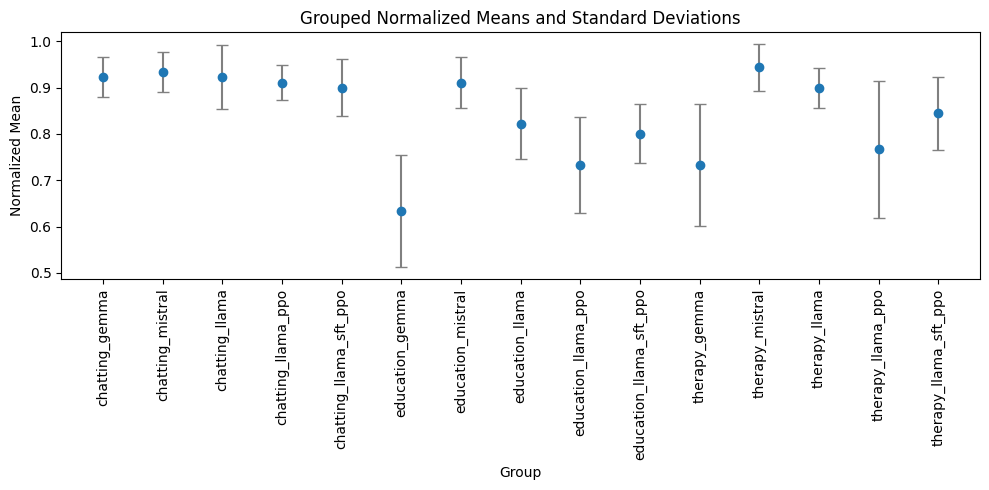

In [16]:
plt.figure(figsize=(10, 5))
x = np.arange(len(grouped_means))
plt.errorbar(x, grouped_means, yerr=grouped_stds, fmt='o', ecolor='gray', capsize=4)
plt.xticks(x, models, rotation=90)
plt.xlabel('Group')
plt.ylabel('Normalized Mean')
plt.title('Grouped Normalized Means and Standard Deviations')
plt.tight_layout()
plt.show()

In [17]:
with open('qualtrics_selected_indices.json', 'r') as f:
    indices = json.load(f)

print(indices)

{'chatting_gemma': {'files': ['/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_10_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_20_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_40_89.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/gemma-2-2b-it_0_60_89.json'], 'indices': [137], 'conv_index': 7}, 'chatting_mistral': {'files': ['/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_10_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_20_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_40_727.json', '/nfs/kun2/users/ryan_cheng/consistency_LLMs/data/chatting/nonfinetuned/mistral-instruct_0_60_727.json'], 'indices': [19], 'conv_index': 1}, 'chatting_llama': {'files': ['/nfs/kun2/us

In [18]:
base_path = Path("/nfs/kun2/users/ryan_cheng/consistency_LLMs")

In [19]:
chatting_gemma, chatting_gemma_files = load_data(base_path, "Chatting Nonfinetuned", "gemma")
chatting_mistral, chatting_mistral_files = load_data(base_path, "Chatting Nonfinetuned", "mistral")
chatting_llama, chatting_llama_files = load_data(base_path, "Chatting Nonfinetuned", "Llama-3.1-8B-Instruct")
chatting_llama_ppo, chatting_llama_ppo_files = load_data(base_path, "Chatting Finetuned", "llama-8b-ppo-high-lr")
chatting_llama_sftppo, chatting_llama_sftppo_files = load_data(base_path, "Chatting Finetuned", "llama-8b-sft-ppo")

education_gemma, education_gemma_files = load_data(base_path, "Education Nonfinetuned", "gemma")
education_mistral, education_mistral_files = load_data(base_path, "Education Nonfinetuned", "mistral")
education_llama, education_llama_files = load_data(base_path, "Education Nonfinetuned", "Llama-3.1-8B-Instruct")
education_ppo_high_lr, education_ppo_high_lr_files = load_data(base_path, "Education Finetuned", "ppo_high_lr_Llama-3.1-8B")
education_ppo_sft_new_lr, education_ppo_sft_new_lr_files = load_data(base_path, "Education Finetuned", "ppo_sft_Llama")

therapy_gemma, therapy_gemma_files = load_data(base_path, "Therapy Nonfinetuned", "gemma")
therapy_mistral, therapy_mistral_files = load_data(base_path, "Therapy Nonfinetuned", "mistral")
therapy_llama, therapy_llama_files = load_data(base_path, "Therapy Nonfinetuned", "Llama-3.1-8B-Instruct")
therapy_ppo_llama, therapy_ppo_llama_files = load_data(base_path, "Therapy Finetuned", "ppo_Llama-3.1-8B")
therapy_ppo_sft_new_lr_llama, therapy_ppo_sft_new_lr_llama_files = load_data(base_path, "Therapy Finetuned", "ppo_sft_new_lr_Llama-3.1-8B-Instruct")

Loaded 100 records from gemma-2-2b-it_0_10_89.json
Loaded 100 records from gemma-2-2b-it_0_20_89.json
Loaded 100 records from gemma-2-2b-it_0_40_89.json
Loaded 100 records from gemma-2-2b-it_0_60_89.json
Loaded 100 records from mistral-instruct_0_10_727.json
Loaded 100 records from mistral-instruct_0_20_727.json
Loaded 100 records from mistral-instruct_0_40_727.json
Loaded 100 records from mistral-instruct_0_60_727.json
Loaded 400 records from Llama-3.1-8B-Instruct_0_623.json
Loaded 10 records from llama-8b-ppo-high-lr_0_10_749.json
Loaded 10 records from llama-8b-ppo-high-lr_0_20_749.json
Loaded 10 records from llama-8b-ppo-high-lr_0_40_749.json
Loaded 10 records from llama-8b-ppo-high-lr_0_60_749.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_10_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_20_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_40_56.json
Loaded 10 records from llama-8b-sft-ppo-prompt_0_60_56.json
Loaded 400 records from gemma-2-2b-it_0_852.jso

In [20]:
all_runs = [
    chatting_gemma,
    chatting_mistral,
    chatting_llama,
    chatting_llama_ppo,
    chatting_llama_sftppo,
    education_gemma,
    education_mistral,
    education_llama,
    education_ppo_high_lr,
    education_ppo_sft_new_lr,
    therapy_gemma,
    therapy_mistral,
    therapy_llama,
    therapy_ppo_llama,
    therapy_ppo_sft_new_lr_llama
]

In [21]:
from utils import extract_list

INFO 07-20 13:57:39 [__init__.py:239] Automatically detected platform cuda.


In [22]:
prompt_consistencies = []
line_to_line_consistencies = []
line_to_line_consistencies_binarized = []

for i, data in enumerate(indices.values()):
    index = data['indices'][0]
    conv_index = data['conv_index'] // 2 # always 2nd agent
    conv = all_runs[i][index]
    prompt_consistency = conv['eval_prompt_consistency']
    for j in range(5):
        # prompt consistency
        if 'YES' in prompt_consistency[conv_index + j][1]:
            prompt_consistencies.append(0)
        else:
            prompt_consistencies.append(1)

        #index consistency
        if data['conv_index'] + j != 1:
            index_list = extract_list(conv['eval_index_consistency'][conv_index + j - 1][1])
            index_score = 0
            for k in index_list:

                if k != None and k % 2 == 1: # filter out non-agent indices
                    index_score += 1
            line_score = 1 - (index_score / ((data['conv_index'] + 2*j) // 2))
            line_to_line_consistencies.append(line_score)
            line_to_line_consistencies_binarized.append(round(line_score))
        else:
            line_to_line_consistencies.append(None)
            line_to_line_consistencies_binarized.append(None)
    print(conv)

{'task_name': 'Chatting', 'P1': '"Ethan Thompson is a 32-year-old White male who resides in Omaha, Nebraska. Born and raised in a small town in rural Nebraska, Ethan\'s upbringing instilled in him a strong sense of community and a love for the outdoors. He is the youngest of three siblings, with two older sisters who are both married with children. His parents, high school sweethearts, own a local farm that has been in their family for generations. Ethan\'s father is a proud veteran who served in the US Army, and his mother is an avid gardener who runs a small, organic produce stand at the local farmer\'s market.\\n\\nEthan\'s childhood was filled with activities like hunting, fishing, and playing sports, which developed his passion for the environment and physical fitness. He was an active member of the 4-H club and won several awards for his cattle-raising projects. In high school, Ethan was a star player on the football team and graduated as valedictorian. He received a full scholar

In [23]:
binary_table.loc[len(binary_table)] = prompt_consistencies
binary_table.loc[len(binary_table)] = line_to_line_consistencies
binary_table.loc[len(binary_table)] = line_to_line_consistencies_binarized
binary_table.rename(index={3: 'Prompt Consistency', 4: 'Line to Line Consistency', 5: 'Line to Line Consistency Binarized'}, inplace=True)
binary_table

,QID2669,QID2670,QID2671,QID2672,QID2673,QID2675,QID2676,QID2677,QID2678,QID2679,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.000000,0.0
Human 2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Human 3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Prompt Consistency,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
Line to Line Consistency,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0.8,1.0,1.0,1.0,0.888889,NaN,0.0,1.0,0.666667,1.0
Line to Line Consistency Binarized,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,NaN,0.0,1.0,1.000000,1.0


In [24]:
question_numeric.loc[len(question_numeric)] = prompt_consistencies
question_numeric.loc[len(question_numeric)] = line_to_line_consistencies
question_numeric.loc[len(question_numeric)] = line_to_line_consistencies_binarized
question_numeric.rename(index={3: 'Prompt Consistency', 4: 'Line to Line Consistency', 5: 'Line to Line Consistency Binarized'}, inplace=True)
question_numeric

,QID2669,QID2670,QID2671,QID2672,QID2673,QID2675,QID2676,QID2677,QID2678,QID2679,...,QID2747,QID2748,QID2749,QID2750,QID2751,QID2753,QID2754,QID2755,QID2756,QID2757
Human 1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000,...,1.000000,0.666667,0.333333,0.166667,0.166667,0.833333,0.833333,0.833333,0.500000,0.500000
Human 2,0.833333,0.833333,0.833333,0.833333,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Human 3,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333
Prompt Consistency,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Line to Line Consistency,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,0.800000,1.000000,1.000000,1.000000,0.888889,NaN,0.000000,1.000000,0.666667,1.000000
Line to Line Consistency Binarized,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,1.000000,1.000000,1.000000


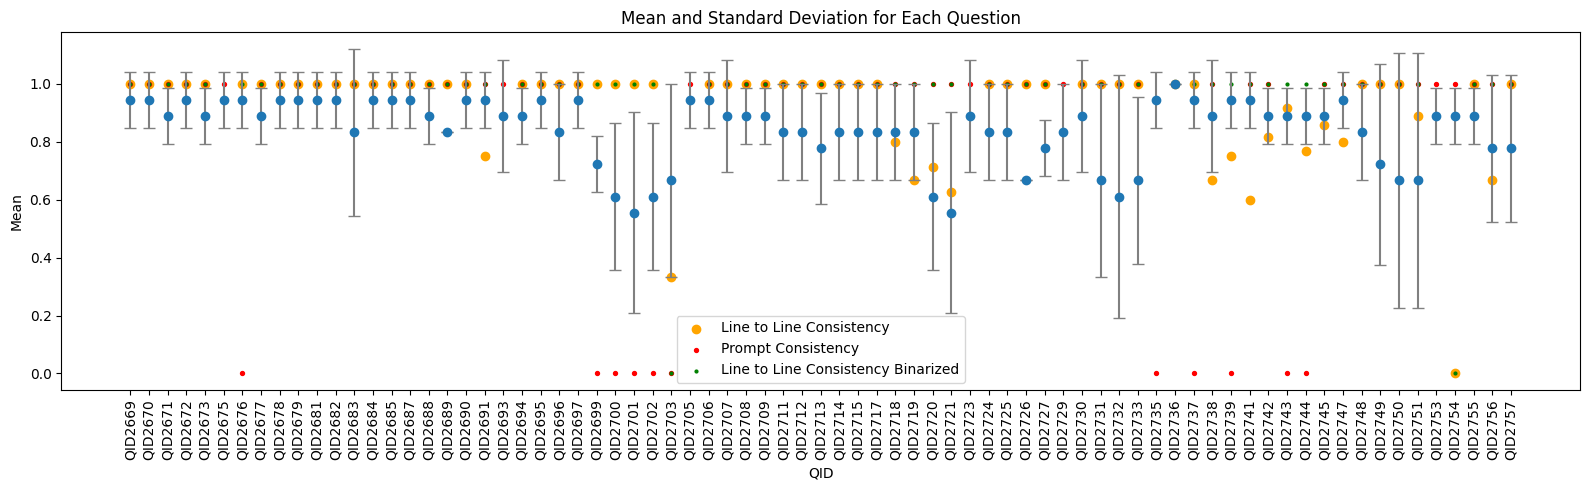

In [25]:
plt.figure(figsize=(16, 5))
plt.errorbar(question_means.index, question_means.values, yerr=question_stds.values, fmt='o', ecolor='gray', capsize=4)
plt.scatter(question_means.index, binary_table.iloc[-2], label='Line to Line Consistency', color='orange')
plt.scatter(question_means.index, binary_table.iloc[-3], label='Prompt Consistency', color='red', s=8)
plt.scatter(question_means.index, binary_table.iloc[-1], label='Line to Line Consistency Binarized', color='green', s=4)


plt.xticks(rotation=90)
plt.xlabel('QID')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for Each Question')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Compute correlation matrix between rows of binary_table
corr_matrix = binary_table.T.corr(method='kendall')
corr_matrix

,Human 1,Human 2,Human 3,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.000000,0.242653,-0.055691,0.188294,0.138151,0.126623
Human 2,0.242653,1.000000,-0.013514,-0.048194,-0.065743,-0.021267
Human 3,-0.055691,-0.013514,1.000000,-0.048194,-0.065743,-0.021267
Prompt Consistency,0.188294,-0.048194,-0.048194,1.000000,0.124866,0.173476
Line to Line Consistency,0.138151,-0.065743,-0.065743,0.124866,1.000000,0.363682
Line to Line Consistency Binarized,0.126623,-0.021267,-0.021267,0.173476,0.363682,1.000000


Text(0.5, 1.0, 'Kendall Correlation of Binarized Responses')

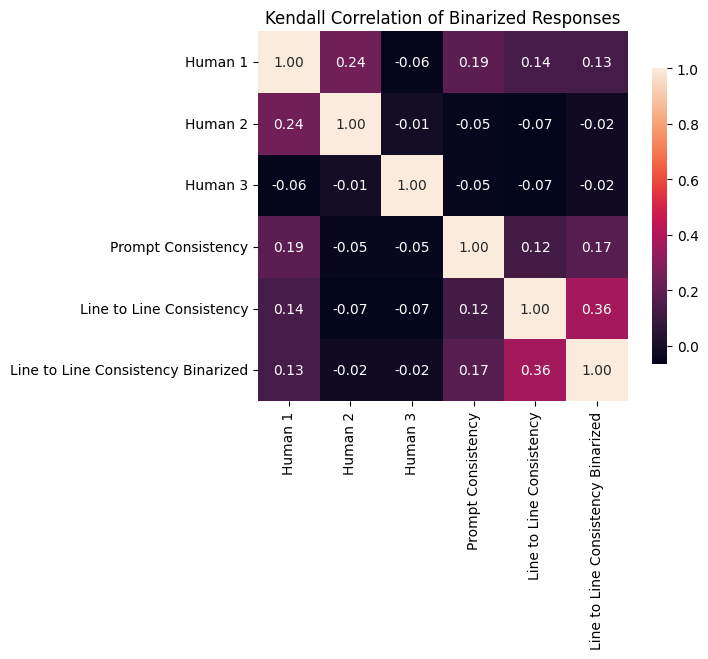

In [55]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Kendall Correlation of Binarized Responses")

In [29]:
corr_matrix_numeric = question_numeric.T.corr(method='kendall')
corr_matrix_numeric

,Human 1,Human 2,Human 3,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.000000,0.116674,-0.227008,0.288706,0.169349,0.164348
Human 2,0.116674,1.000000,-0.130313,0.093958,-0.055715,0.027438
Human 3,-0.227008,-0.130313,1.000000,-0.212380,-0.104310,-0.139231
Prompt Consistency,0.288706,0.093958,-0.212380,1.000000,0.124866,0.173476
Line to Line Consistency,0.169349,-0.055715,-0.104310,0.124866,1.000000,0.363682
Line to Line Consistency Binarized,0.164348,0.027438,-0.139231,0.173476,0.363682,1.000000


Text(0.5, 1.0, 'Kendall Correlation of Responses')

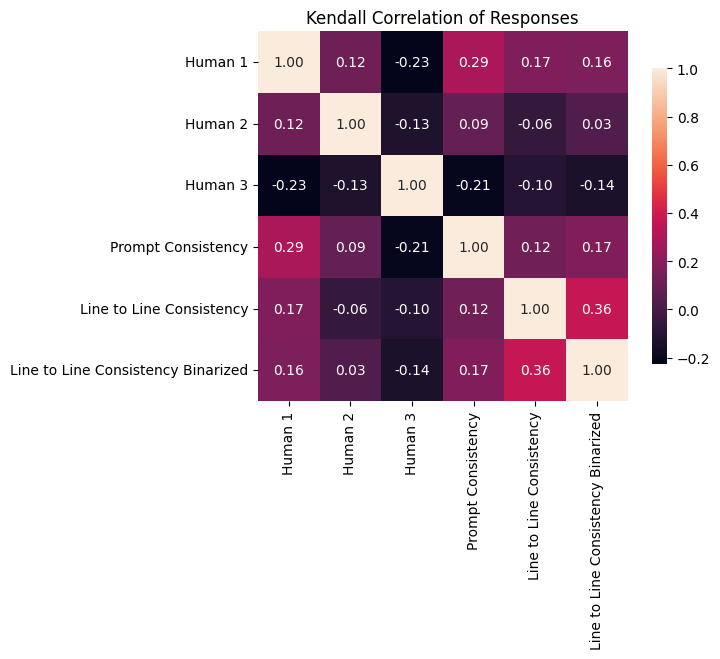

In [56]:
sns.heatmap(corr_matrix_numeric, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Kendall Correlation of Responses")

In [ ]:
from sklearn.metrics import cohen_kappa_score

row_names = binary_table.index.tolist()
kappa_matrix = pd.DataFrame(index=row_names, columns=row_names)

for i in range(len(binary_table)):
    for j in range(len(binary_table)):
        if i != j:
            row_i = binary_table.iloc[i]
            row_j = binary_table.iloc[j]
            # Drop positions where either row contains NaN
            mask = ~(row_i.isna() | row_j.isna())
            # Convert to integer
            arr_i = (row_i[mask]  * 6).astype(int)
            arr_j = (row_j[mask] * 6).astype(int)
            kappa = cohen_kappa_score(arr_i, arr_j, weights='linear')
            kappa_matrix.iloc[i, j] = kappa
        else:
            kappa_matrix.iloc[i, j] = 1.0  # Perfect agreement with self

kappa_matrix

,Human 1,Human 2,Human 3,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.0,0.111212,-0.025524,0.186343,0.090446,0.077519
Human 2,0.111212,1.0,-0.013514,-0.025057,-0.026685,-0.02
Human 3,-0.025524,-0.013514,1.0,-0.025057,-0.026685,-0.02
Prompt Consistency,0.186343,-0.025057,-0.025057,1.0,0.088821,0.123711
Line to Line Consistency,0.090446,-0.026685,-0.026685,0.088821,1.0,0.344473
Line to Line Consistency Binarized,0.077519,-0.02,-0.02,0.123711,0.344473,1.0


In [58]:
kappa_matrix

,Human 1,Human 2,Human 3,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.0,0.111212,-0.025524,0.186343,0.090446,0.077519
Human 2,0.111212,1.0,-0.013514,-0.025057,-0.026685,-0.02
Human 3,-0.025524,-0.013514,1.0,-0.025057,-0.026685,-0.02
Prompt Consistency,0.186343,-0.025057,-0.025057,1.0,0.088821,0.123711
Line to Line Consistency,0.090446,-0.026685,-0.026685,0.088821,1.0,0.344473
Line to Line Consistency Binarized,0.077519,-0.02,-0.02,0.123711,0.344473,1.0


Text(0.5, 1.0, "Cohen's Kappa Linearly Weighted from Binarized Responses")

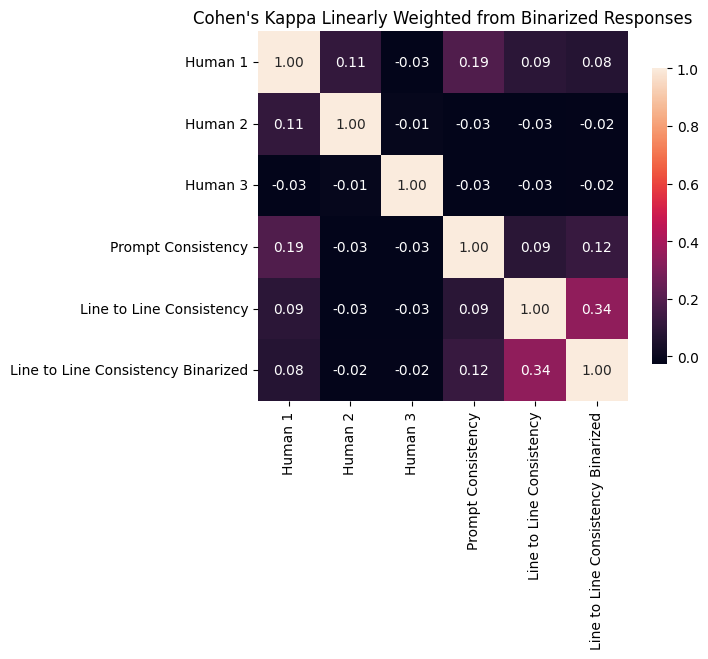

In [59]:
kappa_matrix = kappa_matrix.astype(float)
sns.heatmap(kappa_matrix, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Cohen's Kappa Linearly Weighted from Binarized Responses")

In [ ]:
row_names_numeric = question_numeric.index.tolist()
kappa_matrix_numeric = pd.DataFrame(index=row_names_numeric, columns=row_names_numeric)

for i in range(len(question_numeric)):
    for j in range(len(question_numeric)):
        if i != j:
            row_i = question_numeric.iloc[i]
            row_j = question_numeric.iloc[j]
            # Drop positions where either row contains NaN
            mask = ~(row_i.isna() | row_j.isna())
            # Convert to integer 
            arr_i = (row_i[mask] * 6).astype(int)
            arr_j = (row_j[mask] * 6).astype(int)
            kappa = cohen_kappa_score(arr_i, arr_j, weights='linear')
            kappa_matrix_numeric.iloc[i, j] = kappa
        else:
            kappa_matrix_numeric.iloc[i, j] = 1.0  # Perfect agreement with self

kappa_matrix_numeric

,Human 1,Human 2,Human 3,Prompt Consistency,Line to Line Consistency,Line to Line Consistency Binarized
Human 1,1.0,0.108728,-0.089716,0.180461,0.121811,0.063361
Human 2,0.108728,1.0,-0.085209,0.058676,-0.025862,0.011628
Human 3,-0.089716,-0.085209,1.0,-0.0699,-0.036759,-0.02535
Prompt Consistency,0.180461,0.058676,-0.0699,1.0,0.088821,0.123711
Line to Line Consistency,0.121811,-0.025862,-0.036759,0.088821,1.0,0.344473
Line to Line Consistency Binarized,0.063361,0.011628,-0.02535,0.123711,0.344473,1.0


Text(0.5, 1.0, "Cohen's Kappa Linearly Weighted from Responses")

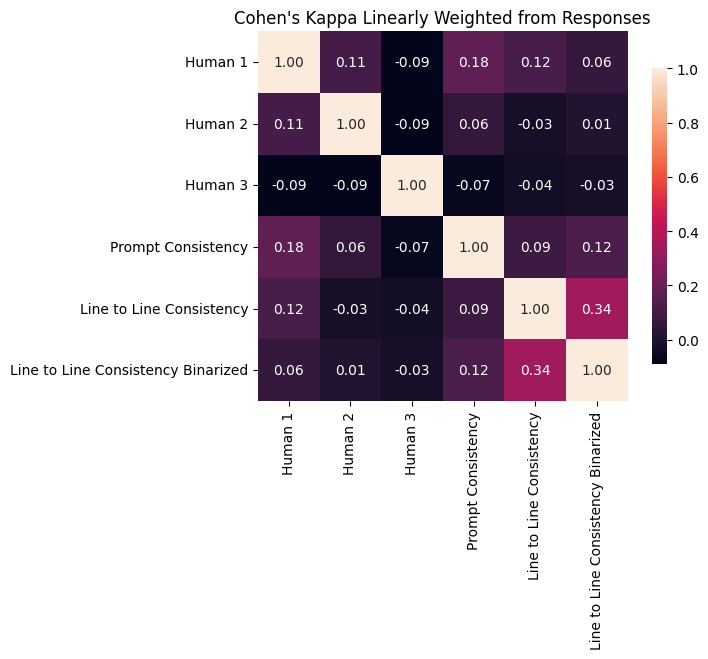

In [61]:
kappa_matrix_numeric = kappa_matrix_numeric.astype(float)
sns.heatmap(kappa_matrix_numeric, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Cohen's Kappa Linearly Weighted from Responses")

In [47]:
import pingouin as pg

# Reshape binary_table to long format for ICC and drop NaN ratings
df_long = (
    binary_table
    .reset_index()
    .dropna()
)

icc_result = pg.intraclass_corr(data=df_long, targets='target', raters='rater', ratings='rating')
print(icc_result)

AssertionError: 